In [5]:
from pdfminer.pdfinterp import PDFResourceManager, process_pdf
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from io import StringIO
from io import open
from urllib.request import urlopen
import re
import os


In [6]:
def read_pdf_file(pdfFile):
    pdfrm = PDFResourceManager()
    strio = StringIO()
    lapa = LAParams()
    device = TextConverter(pdfrm, strio, laparams = lapa)
    
    process_pdf(pdfrm, device, pdfFile)
    device.close()
    
    content = strio.getvalue()
    strio.close()
    return content

In [7]:
pdf_samsung = open("environment/LG생활건강.pdf", "rb")
a = read_pdf_file(pdf_samsung)
pdf_samsung.close() 

pdf_skens = open("environment/LG전자.pdf", "rb")
b = read_pdf_file(pdf_skens)
pdf_skens.close()

pdf_skens = open("environment/SK하이닉스.pdf", "rb")
c = read_pdf_file(pdf_skens)
pdf_skens.close()

pdf_skens = open("environment/삼성SDI.pdf", "rb")
d = read_pdf_file(pdf_skens)
pdf_skens.close()

pdf_skens = open("environment/삼성물산.pdf", "rb")
e = read_pdf_file(pdf_skens)
pdf_skens.close()

In [8]:
from konlpy.tag import Mecab
mecab = Mecab()

tokens = []
def word_token (x) :
    for token in mecab.pos(x):
        tokens.append(token)
    return tokens

word_token(a)
word_token(b)
word_token(c)
word_token(d)
word_token(e)

[('2020', 'SN'),
 ('LG', 'SL'),
 ('생활', 'NNG'),
 ('건강', 'NNG'),
 ('ESG', 'SL'),
 ('보고서', 'NNG'),
 ('F', 'SL'),
 ('O', 'SL'),
 ('R', 'SL'),
 ('P', 'SL'),
 ('E', 'SL'),
 ('O', 'SL'),
 ('P', 'SL'),
 ('L', 'SL'),
 ('E', 'SL'),
 ('A', 'SL'),
 ('N', 'SL'),
 ('D', 'SL'),
 ('T', 'SL'),
 ('H', 'SL'),
 ('E', 'SL'),
 ('P', 'SL'),
 ('L', 'SL'),
 ('A', 'SL'),
 ('N', 'SL'),
 ('E', 'SL'),
 ('T', 'SL'),
 ('', 'SY'),
 ('', 'SY'),
 ('About', 'SL'),
 ('This', 'SL'),
 ('Report', 'SL'),
 ('보고서', 'NNG'),
 ('개요', 'NNG'),
 ('LG', 'SL'),
 ('생활', 'NNG'),
 ('건강', 'NNG'),
 ('은', 'JX'),
 ('2009', 'SN'),
 ('년', 'NNBC'),
 ('부터', 'JX'),
 ('매년', 'MAG'),
 ('ESG', 'SL'),
 ('보고서', 'NNG'),
 ('를', 'JKO'),
 ('발간', 'NNG'),
 ('하', 'XSV'),
 ('여', 'EC'),
 ('당사', 'NNG'),
 ('의', 'JKG'),
 ('지속', 'NNG'),
 ('가능', 'NNG'),
 ('경영', 'NNG'),
 ('을', 'JKO'),
 ('외', 'NNG'),
 ('부', 'NNG'),
 ('에', 'JKB'),
 ('공유', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('습니다', 'EF'),
 ('.', 'SF'),
 ('‘', 'SY'),
 ('2020', 'SN'),
 ('LG', 'SL'),
 ('생

In [9]:
from konlpy.tag import Mecab
mecab = Mecab()
stop = ["회사", "에서", "위해", "관련", "기준"]
# tokens = [token for token in mecab.pos(samsung_display)]

nodes = [t[0] for t in tokens]
vocab = [t[0] for t in tokens if t[0] not in stop if t[1] in ['NNG', 'NNP'] and len(t[0]) > 1]

print(nodes[:10])
print(vocab[:10])


['2020', 'LG', '생활', '건강', 'ESG', '보고서', 'F', 'O', 'R', 'P']
['생활', '건강', '보고서', '보고서', '개요', '생활', '건강', '보고서', '발간', '당사']


In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

count = Counter(vocab)
words = dict(count.most_common())

In [11]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


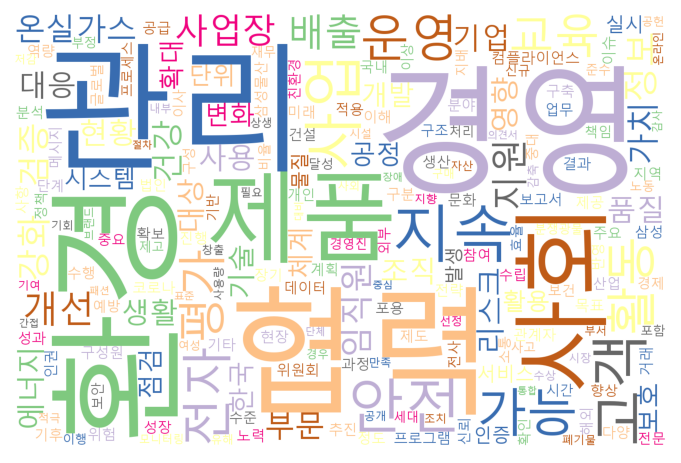

In [12]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", 
                      width=1500, height=1000).generate_from_frequencies(words) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [13]:
vocab = list(set(vocab))

vocab2idx = {vocab[i]:i for i in range(len(vocab))}
idx2vocab = {i:vocab[i] for i in range(len(vocab))}

In [14]:
import numpy as np
import math

vocab_len = len(vocab2idx)

# 토큰별로 그래프 edge를 Matrix 형태로 생성
weighted_edge = np.zeros((vocab_len,vocab_len),dtype=np.float32)

# 각 토큰 노드별로 스코어 1로 초기화
score = np.ones((vocab_len),dtype=np.float32)

# coocurrence를 판단하기 위한 window 사이즈 설정
window_size = 4
covered_coocurrences = []

for window_start in range(len(nodes) - window_size + 1):
    window = nodes[window_start:window_start+window_size]
    for i in range(window_size):
        for j in range(i+1, window_size):
            if window[i] in vocab and window[j] in vocab:
                index_i = window_start + i
                index_j = window_start + j

                if (index_i, index_j) not in covered_coocurrences:
                    weighted_edge[vocab2idx[window[i]]][vocab2idx[window[j]]] = 1
                    weighted_edge[vocab2idx[window[j]]][vocab2idx[window[i]]] = 1
                    covered_coocurrences.append((index_i, index_j))

for i in range(vocab_len):
    row_sum = weighted_edge[i].sum()
    weighted_edge[i] = weighted_edge[i]/row_sum if row_sum > 0 else 0

MAX_ITERATIONS = 50
d=0.85
threshold = 0.0001 #convergence threshold

for iter in range(MAX_ITERATIONS):
    prev_score = np.copy(score)

    for i in range(vocab_len):
        summation = 0
        for j in range(vocab_len):
            if weighted_edge[j][i] != 0:
                summation += weighted_edge[j][i] * prev_score[j]

        score[i] = (1 - d) * d*summation

    if np.sum(np.fabs(prev_score -  score)) <= threshold:
        break


sorted_index = np.flip(np.argsort(score), 0)

n = 50


print("\n=== 핵심키워드 ===")
for i in range(0,n):
    print(str(idx2vocab[sorted_index[i]])+" : " + str(score[sorted_index[i]]))


=== 핵심키워드 ===
관리 : 3.4990844e-08
제품 : 3.251817e-08
환경 : 2.9501109e-08
협력 : 2.8964921e-08
사업 : 2.8506618e-08
활동 : 2.8314378e-08
고객 : 2.810443e-08
교육 : 2.791175e-08
안전 : 2.660436e-08
사회 : 2.643786e-08
운영 : 2.6219686e-08
지원 : 2.539117e-08
개선 : 2.4125612e-08
경영 : 2.3636774e-08
대상 : 2.3406127e-08
정보 : 2.280032e-08
평가 : 2.23878e-08
강화 : 2.2319396e-08
임직원 : 2.2299147e-08
전자 : 2.2285365e-08
가능 : 2.0647652e-08
기술 : 2.0190525e-08
지속 : 2.0133227e-08
사업장 : 2.011721e-08
기업 : 1.9961611e-08
부문 : 1.9881915e-08
사용 : 1.9752083e-08
한국 : 1.8912381e-08
개발 : 1.8834223e-08
건강 : 1.8710335e-08
다양 : 1.8353393e-08
생활 : 1.7318634e-08
주요 : 1.7007032e-08
활용 : 1.6942238e-08
현황 : 1.6879499e-08
확대 : 1.6829048e-08
지역 : 1.6790251e-08
글로벌 : 1.6782634e-08
에너지 : 1.5821024e-08
품질 : 1.5776575e-08
리스크 : 1.573659e-08
대응 : 1.5639374e-08
조직 : 1.5601254e-08
시스템 : 1.5142444e-08
공정 : 1.4890783e-08
구분 : 1.47747965e-08
물질 : 1.4724996e-08
해외 : 1.4536631e-08
점검 : 1.4458986e-08
업무 : 1.4301044e-08


In [21]:
w = []
v = []
for i in range(0, 5000) :
    w.append(str(idx2vocab[sorted_index[i]]))
    v.append(str(score[sorted_index[i]]))

In [22]:
import pandas as pd

In [23]:
environment_df = pd.DataFrame({"keyword" : w,  "score" : v})

In [24]:
environment_df.to_csv("environment_top5.csv")

In [25]:
environment_df.astype({"score" : float})

,keyword,score
0,관리,3.499084e-08
1,제품,3.251817e-08
2,환경,2.950111e-08
3,협력,2.896492e-08
4,사업,2.850662e-08
...,...,...
4995,무공,1.078405e-10
4996,결권,1.078385e-10
4997,토단,1.078369e-10
4998,안면,1.078302e-10


In [27]:
keyword = []
for i in range(0,15):
    keyword.append(str(idx2vocab[sorted_index[i]]))

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 3

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(keyword)
svd = TruncatedSVD(n_components=n_topic, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [29]:
vocab = tfidf_vect.get_feature_names()
print(vocab)
n = 3
for i, topic in enumerate(Vt):
    print("Topic {}".format(i), [ (vocab[i], topic[i], round(3)) for i in topic.argsort()[:-n-1:-1]])

['개선', '경영', '고객', '관리', '교육', '대상', '사업', '사회', '안전', '운영', '제품', '지원', '협력', '환경', '활동']
Topic 0 [('사업', 0.565429687795155, 3), ('개선', 0.44872603945620626, 3), ('협력', 0.33079559849504725, 3)]
Topic 1 [('사회', 0.6011662283764354, 3), ('지원', 0.37491022586592604, 3), ('안전', 0.2791819625870472, 3)]
Topic 2 [('운영', 0.7335600368730327, 3), ('지원', 0.3954133820934321, 3), ('관리', 0.30866157462118493, 3)]


In [30]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_simiarlty_matrix(vectors):
    def consine_similarity(a,b):
        return dot(a,b)/(norm(a)*norm(b))
    
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[j, i] = consine_similarity(vectors[i], vectors[j]).round(4)

    return similarity_matrix

In [31]:
word_vectors = Vt.T
word_similarity_matrix = calc_simiarlty_matrix(word_vectors)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix, label):
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.rc('font', family='Malgun Gothic')
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label,
                     annot=True, fmt=".2f", annot_kws={"size":8},cmap="coolwarm")

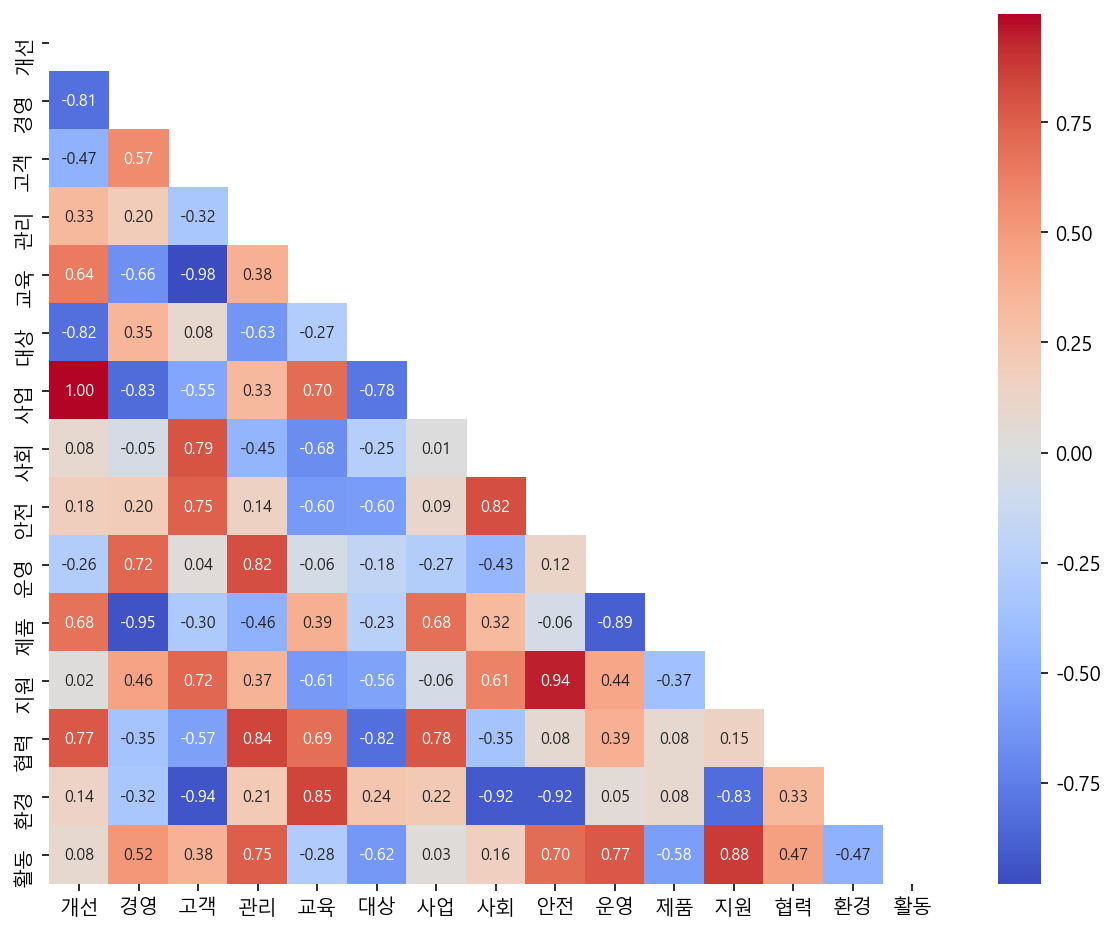

In [35]:
visualize_similarity(word_similarity_matrix, vocab)

In [68]:
from konlpy.tag import Mecab
mecab = Mecab()
stop = ["회사", "에서", "위해", "관련", "기준"]
# tokens = [token for token in mecab.pos(samsung_display)]

t_nodes = [t[0] for t in test_tokens]
t_vocab = [t[0] for t in test_tokens if t[0] not in stop if t[1] in ['NNG', 'NNP'] and len(t[0]) > 1]

print(t_nodes[:10])
print(t_vocab[:10])


['ESG', 'Environment', 'Social', 'Responsibility', 'Corporate', 'Governance', 'Value', '&', 'Impact', '2020']
['금융', '그룹', '지속', '가능', '경영', '보고서', '보고서', '개요', '범위', '금융']


In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

count = Counter(vocab)
words = dict(count.most_common())

In [70]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


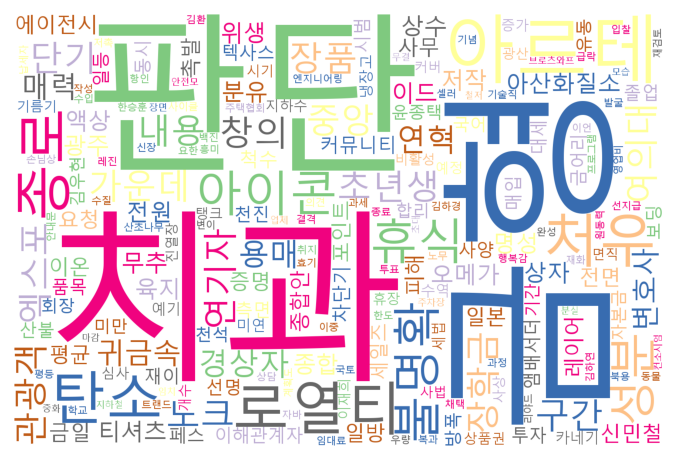

In [71]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", 
                      width=1500, height=1000).generate_from_frequencies(words) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [73]:
t_vocab = list(set(t_vocab))

t_vocab2idx = {t_vocab[i]:i for i in range(len(t_vocab))}
t_idx2vocab = {i:t_vocab[i] for i in range(len(t_vocab))}

In [75]:
import numpy as np
import math

vocab_len = len(t_vocab2idx)

# 토큰별로 그래프 edge를 Matrix 형태로 생성
weighted_edge = np.zeros((vocab_len,vocab_len),dtype=np.float32)

# 각 토큰 노드별로 스코어 1로 초기화
score = np.ones((vocab_len),dtype=np.float32)

# coocurrence를 판단하기 위한 window 사이즈 설정
window_size = 4
covered_coocurrences = []

for window_start in range(len(t_nodes) - window_size + 1):
    window = t_nodes[window_start:window_start+window_size]
    for i in range(window_size):
        for j in range(i+1, window_size):
            if window[i] in t_vocab and window[j] in t_vocab:
                index_i = window_start + i
                index_j = window_start + j

                if (index_i, index_j) not in covered_coocurrences:
                    weighted_edge[t_vocab2idx[window[i]]][t_vocab2idx[window[j]]] = 1
                    weighted_edge[t_vocab2idx[window[j]]][t_vocab2idx[window[i]]] = 1
                    covered_coocurrences.append((index_i, index_j))

for i in range(vocab_len):
    row_sum = weighted_edge[i].sum()
    weighted_edge[i] = weighted_edge[i]/row_sum if row_sum > 0 else 0

MAX_ITERATIONS = 50
d=0.85
threshold = 0.0001 #convergence threshold

for iter in range(MAX_ITERATIONS):
    prev_score = np.copy(score)

    for i in range(vocab_len):
        summation = 0
        for j in range(vocab_len):
            if weighted_edge[j][i] != 0:
                summation += weighted_edge[j][i] * prev_score[j]

        score[i] = (1 - d) * d*summation

    if np.sum(np.fabs(prev_score -  score)) <= threshold:
        break


sorted_index = np.flip(np.argsort(score), 0)

n = 100


print("\n=== 핵심키워드 ===")
t_w = []
t_v = []
for i in range(0, n) :
    t_w.append(str(t_idx2vocab[sorted_index[i]]))
    t_v.append(str(score[sorted_index[i]]))


=== 핵심키워드 ===
금융 : 3.9794784e-08
그룹 : 2.0888672e-08
고객 : 1.8538557e-08
관리 : 1.7934068e-08
경영 : 1.681799e-08
기업 : 1.6757738e-08
지원 : 1.6716362e-08
사회 : 1.6467899e-08
평가 : 1.5269455e-08
임직원 : 1.5077456e-08
환경 : 1.3734466e-08
대상 : 1.3474455e-08
운영 : 1.3386378e-08
리스크 : 1.3166137e-08
보호 : 1.2935837e-08
정보 : 1.2736719e-08
투자 : 1.2583694e-08
상품 : 1.242205e-08
활동 : 1.1862903e-08
강화 : 1.1478627e-08
교육 : 1.1000529e-08
국민은행 : 1.0940457e-08
서비스 : 1.0824752e-08
사업 : 1.0737993e-08
업무 : 1.0628435e-08
다양 : 1.0209164e-08
직원 : 9.971654e-09
주요 : 9.695322e-09
디지털 : 9.562151e-09
확대 : 9.387769e-09
성과 : 9.30747e-09
지역 : 8.958861e-09
가능 : 8.433099e-09
사항 : 8.401622e-09
기후 : 8.339964e-09
지속 : 8.261499e-09
이사 : 8.212033e-09
위원회 : 8.150046e-09
변화 : 7.9466345e-09
이행 : 7.915244e-09
제도 : 7.700161e-09
정책 : 7.597673e-09
소비자 : 7.512947e-09
은행 : 7.384851e-09
대출 : 7.379348e-09
글로벌 : 7.3559816e-09
대응 : 7.2930537e-09
체계 : 7.1913235e-09
친환경 : 7.0712565e-09
제공 : 6.9622463e-09


In [76]:
t_w = []
t_v = []
for i in range(0, 100) :
    t_w.append(str(t_idx2vocab[sorted_index[i]]))
    t_v.append(str(score[sorted_index[i]]))

In [80]:
def JaccardSimilarity(inp1, inp2):
    list_inp1 = inp1.split()
    list_inp2 = inp2.split()
    mom = set(list_inp1).union(set(list_inp2))
    son = set(list_inp1).intersection(set(list_inp2))
    print(mom)
    print(son)
    return len(son)/len(mom)

In [84]:
def JaccardSimilarity(list_inp1, list_inp2):
#     list_inp1 = inp1.split()
#     list_inp2 = inp2.split()
    mom = set(list_inp1).union(set(list_inp2))
    son = set(list_inp1).intersection(set(list_inp2))
#     print(mom)
#     print(son)
    return len(son)/len(mom)

In [85]:
JaccardSimilarity(w, t_w)

0.4084507042253521